# Graded Challange 3

## Perkenalan

Nama : St. Syakirah
Batch : FTDS-016-rmt
Dataset : Data pasien gagal jantung

**Objectives**
Graded Challenge 3 ini dibuat guna mengevaluasi konsep Ensemble Learning sebagai berikut:

Mampu memperoleh data menggunakan BigQuery
Mampu memahami konsep Classification dengan Ensemble Learning.
Mampu mengimplementasikan Ensemble Learning untuk membuat prediksi.
Mampu memahami konsep salah satu algoritma boosting dan mengimplementasikannya dalam kasus Supervised Learning


## Import Libraries

In [83]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split

#Splitting train-test-set
from sklearn.model_selection import train_test_split

#Preprocessing scalling
import sklearn
from sklearn.preprocessing import MinMaxScaler

#Handling Imbalanced Data
from imblearn.over_sampling import SMOTE
#Pipline for scalling
from sklearn.pipeline import Pipeline
##Column Transformer
from sklearn.compose import ColumnTransformer

#Training Model
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#XGBoost
from xgboost import XGBClassifier # Extreme Gradient Boosting 
#Grid Search
from sklearn.model_selection import GridSearchCV
#Cross validation score
from sklearn.model_selection import cross_val_score
#calculate time
import timeit
#Hyperparameter Tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
# Evaluation model menggunakan metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Model Inference
import joblib
import json


## Data Loading

In [2]:
#Loading data
data = pd.read_csv('F:\Hacktiv8\Fase 1\GC3\P1G3_St_Syakirah.csv')

In [3]:
#Cek Jumlah baris dan kolom
data.shape

(299, 13)

Data memiliki 299 baris dan 13 kolom

In [4]:
#Drop data duplikat
data = data.drop_duplicates().reset_index(drop=True)

In [5]:
#Cek Jumlah baris dan kolom setelah dropping
data.shape

(299, 13)

Tidak ditemukan adanya data duplikat.

In [6]:
# Menampilkan 5 Data teratas
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [7]:
# Menampilkan 5 Data Terakhir
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [8]:
#Copy dataset
df = data.copy()

In [9]:
# Mengetahui dimensi data
data.shape

(299, 13)

In [11]:
#Cek data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Semua dataset bertipe numerik, namun pada dasarnya data terdiri data kategorik dan data numerik. Data kategorik meliputi anaemia, diabetes, high blood pressure, sex, smooking dan death event. Data numerik meliputi age, creatinine phosphokinase, ejection fraction, platelets, serum_creatiniene, serum_sodium, dan time.

## Exploratory Data Analysis (EDA)

Analisis kematian akibat gagal jantung

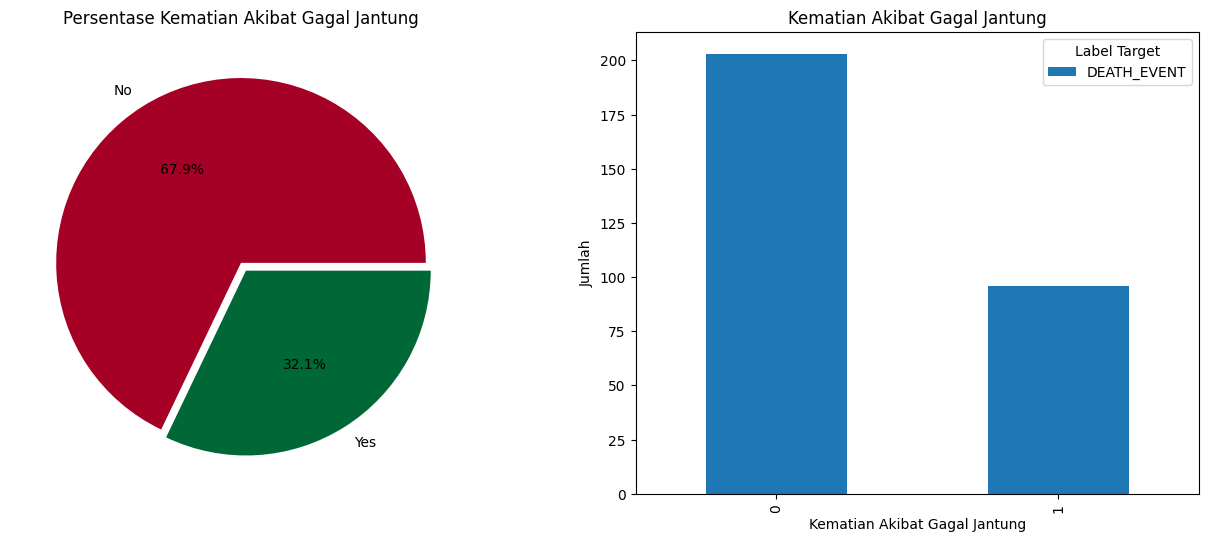

In [12]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
data['DEATH_EVENT'].value_counts().plot(
    kind='pie',
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    explode=[0,0.05],
    cmap='RdYlGn',
    ax=ax[0]
)
ax[0].set_title('Persentase Kematian Akibat Gagal Jantung')
ax[0].set_ylabel('')

#Barchart besaran setiap nilai pada kelas target
data.groupby('DEATH_EVENT').agg({'DEATH_EVENT':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Kematian Akibat Gagal Jantung')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Kematian Akibat Gagal Jantung')
ax[1].legend(title='Label Target')

Hasil plotting pie chart dan bar chart menunjukkan adanya imbalanced data, presentase pasien yang **meninggal** akibat gagal jantung sebesar **67.9%** dan data pasien yang bertahan **hidup** sebesar **32,1%**. Imbalanced data akan berpengaruh pada proses pembelajaran machine learning, sehingga perlu melakukan resempling sebelum pemodelan.

**Analisis Riwayat Anemia**

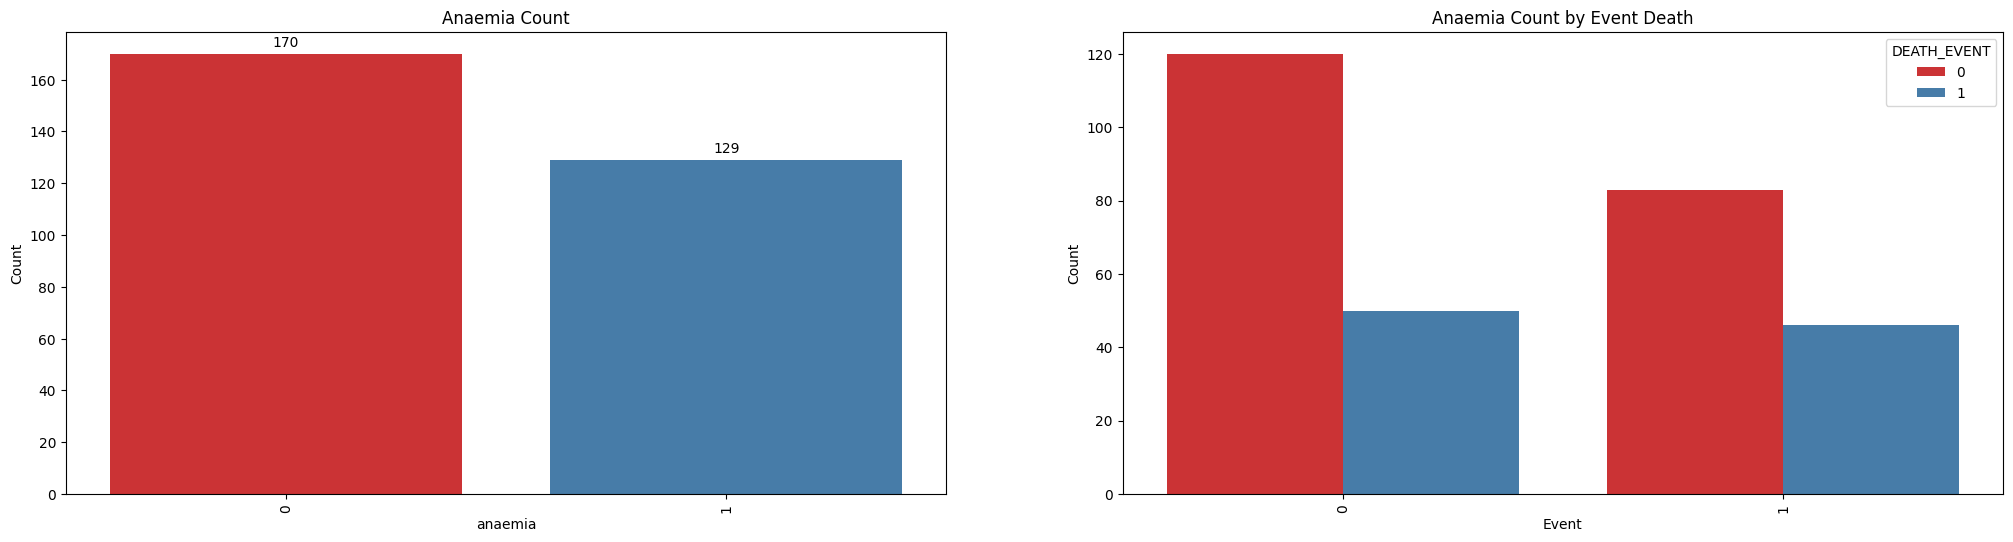

In [13]:
#Pengaruh anemia terhadap kematian akibat gagal jantung
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='anaemia', data=data, order=data.anaemia.value_counts().index,  palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('Anaemia Count')
plt.xlabel('anaemia')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='anaemia', data=data, order=data.anaemia.value_counts().index, palette='Set1', hue='DEATH_EVENT')
plt.title('Anaemia Count by Event Death')
plt.xlabel('Event')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Jumlah pasien yang **tidak mengidap** anaemia lebih banyak dibanding yang **mengidap** anaemia. Data menunjukkan pasien yang **tidak mengidap anemia** juga **tidak meninggal** karena gagal jantung. Namun, potensi pasien seseorang meninggal akibat gagal jantung dan memiliki riwayat anaemia sama besar dengan pasien yang tidak memiliki riwayat anaemia.

**Analisis Diabetes**

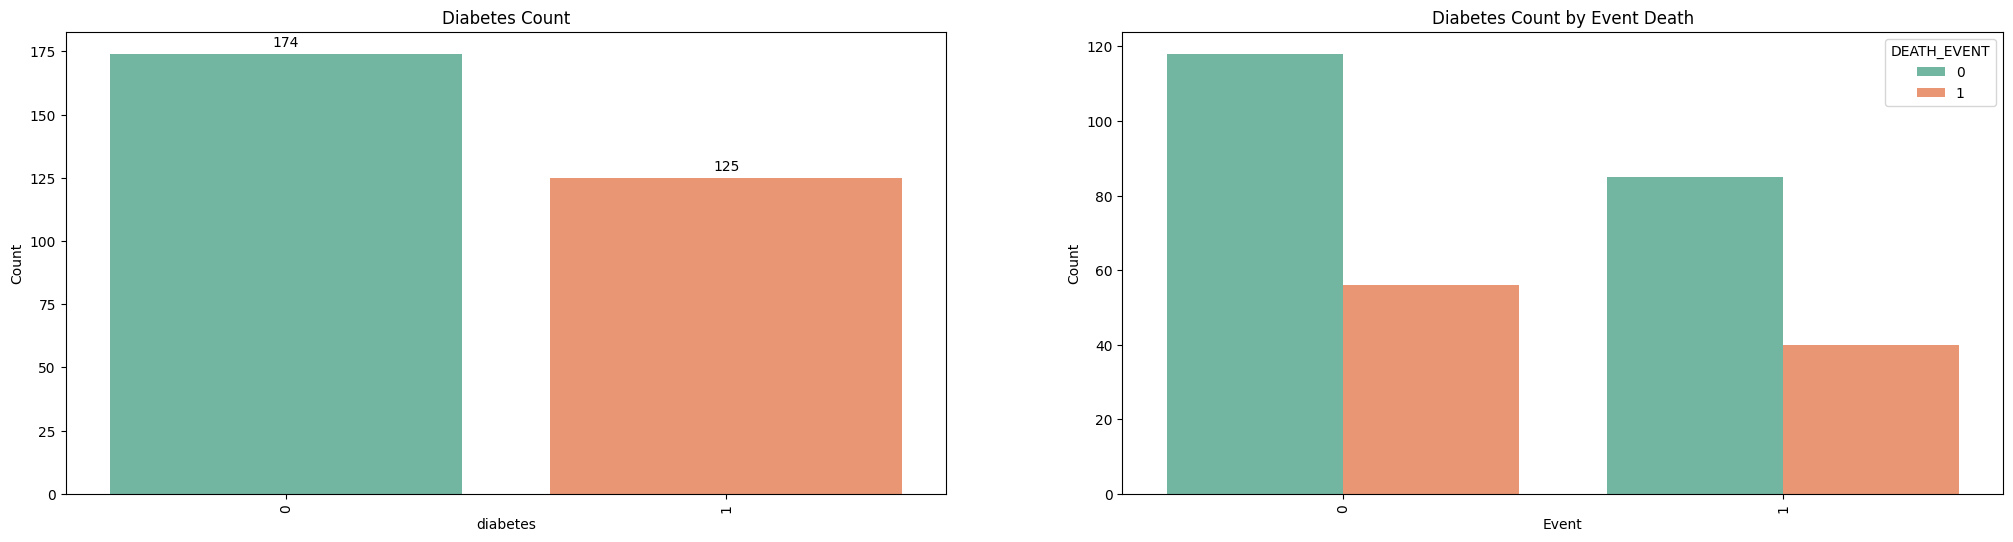

In [14]:
#Plot bar chart
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='diabetes', data=data, order=data.diabetes.value_counts().index, palette='Set2')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('Diabetes Count')
plt.xlabel('diabetes')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='diabetes', data=data, order=data.diabetes.value_counts().index, palette='Set2', hue='DEATH_EVENT')
plt.title('Diabetes Count by Event Death')
plt.xlabel('Event')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Jumlah pasien yang **tidak mengidap** diabetes lebih banyak dibanding yang **mengidap** diabetes. Data menunjukkan pasien yang **tidak mengidap diabetes** juga **tidak meninggal** karena gagal jantung. Selain itu, data pasien meninggal akibat gagal jantung dan memiliki riwayat diabetes lebih besar dibanding  pasien yang tidak memiliki riwayat diabetes.

**Analisis High Blood Pressure**

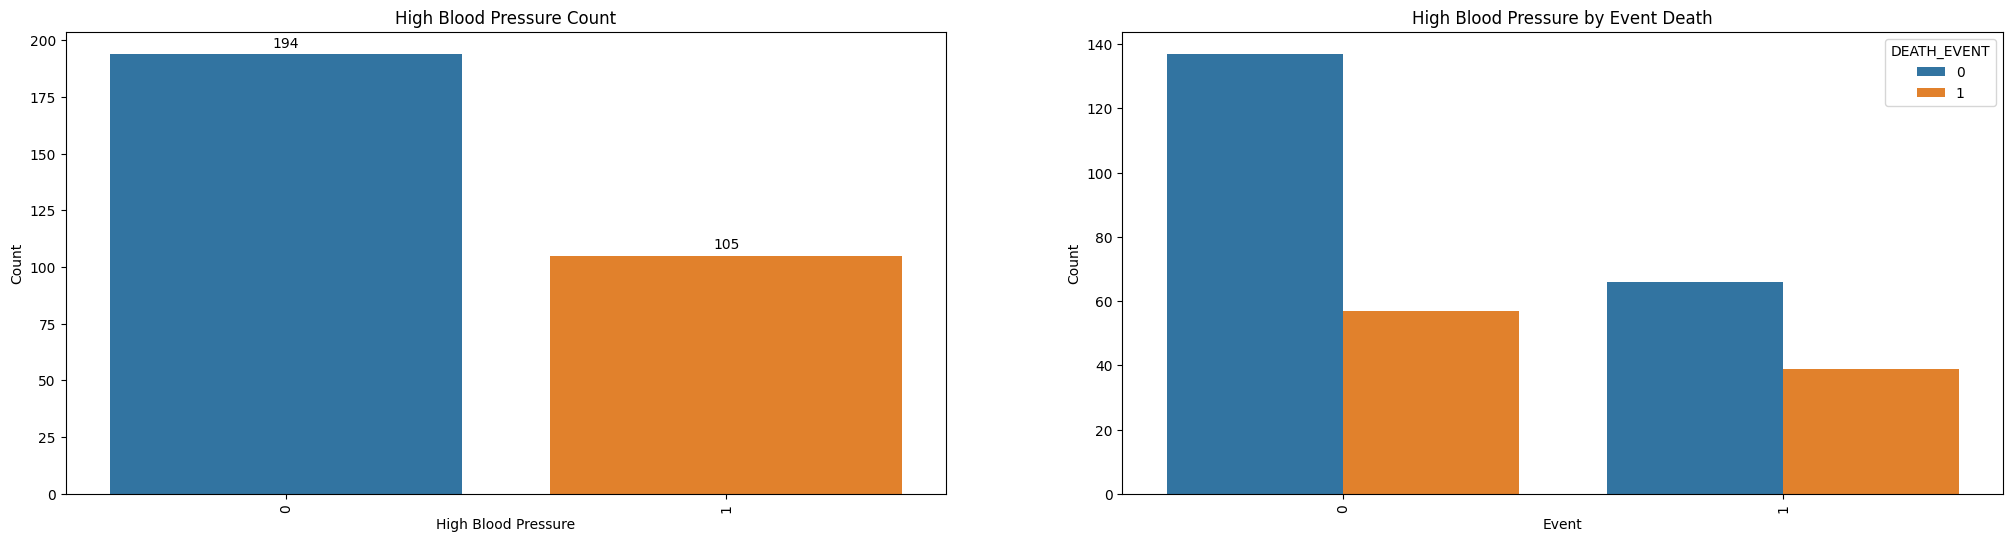

In [15]:
# Plot Bar Chart
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='high_blood_pressure', data=data, order=data.high_blood_pressure.value_counts().index)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('High Blood Pressure Count')
plt.xlabel('High Blood Pressure')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='high_blood_pressure', data=data, order=data.high_blood_pressure.value_counts().index,  hue='DEATH_EVENT')
plt.title('High Blood Pressure by Event Death')
plt.xlabel('Event')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Jumlah pasien yang **tekanan darahnya tinggi** lebih besar dibanding pasien yang **tekanan darahnya tidak tinggi**. Data menunjukkan pasien yang **tekanannya tidak tinggi** juga **tidak meninggal** karena gagal jantung. Selain itu, jumlah data pasien **meninggal** akibat gagal jantung dengan **tekanan yang tinggi** lebih besar dibanding  pasien yang **tekanan darahnya tidak tinggi**. 

**Analisis Gender**

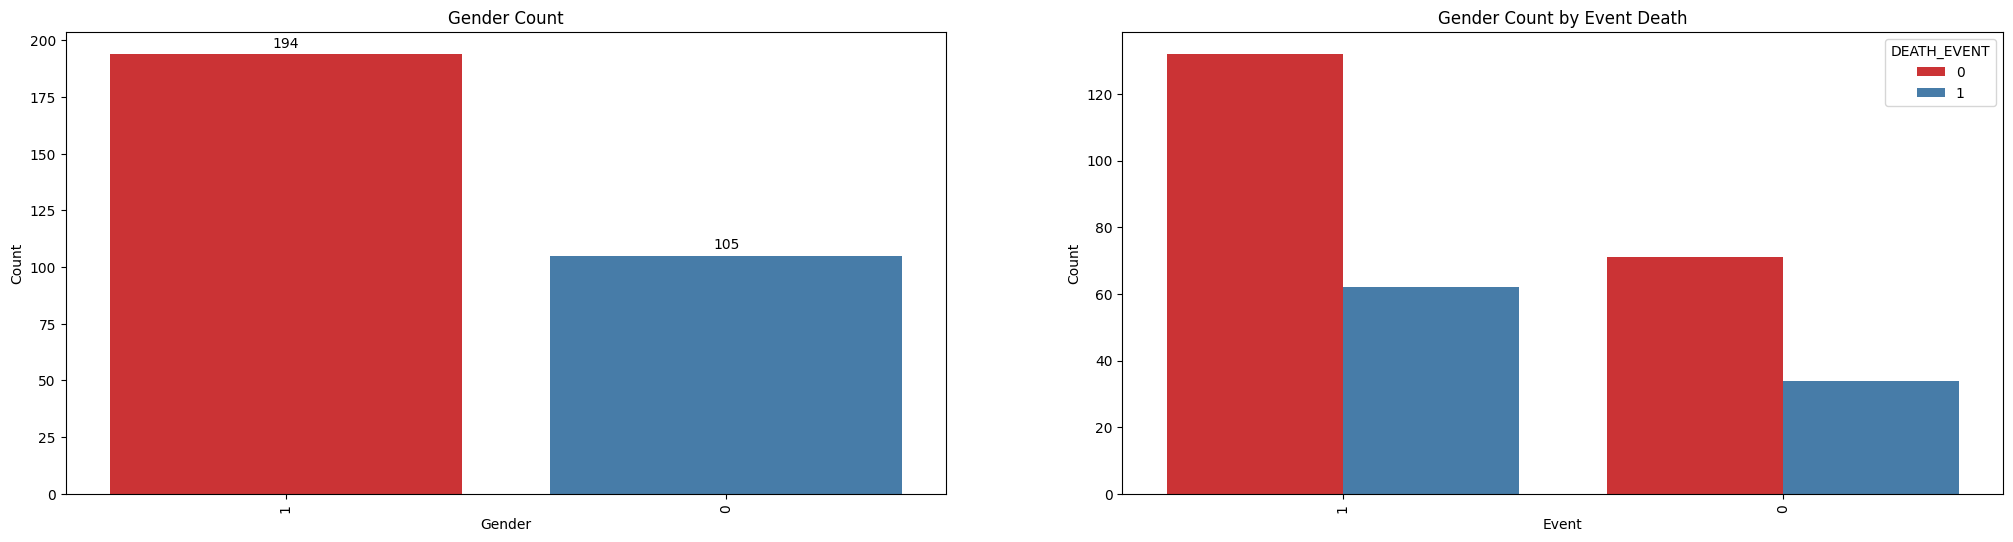

In [16]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='sex', data=data, order=data.sex.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='sex', data=data, order=data.sex.value_counts().index, palette='Set1', hue='DEATH_EVENT')
plt.title('Gender Count by Event Death')
plt.xlabel('Event')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Data diabetes didominasi oleh gender **male**. Jumlah gender **male yang tidak meninggal** akibat gagal jantung lebih banyak dibanding dengan jumlah gender **male yang meninggal**. Sama halnya dengan gender male,  jumlah gender **female yang tidak meninggal** akibat gagal jantung lebih banyak dibanding dengan jumlah gender **female yang meninggal**.

**Analisis Kematian Gagal Jantung Berdasrkan Riwayat Smoking**

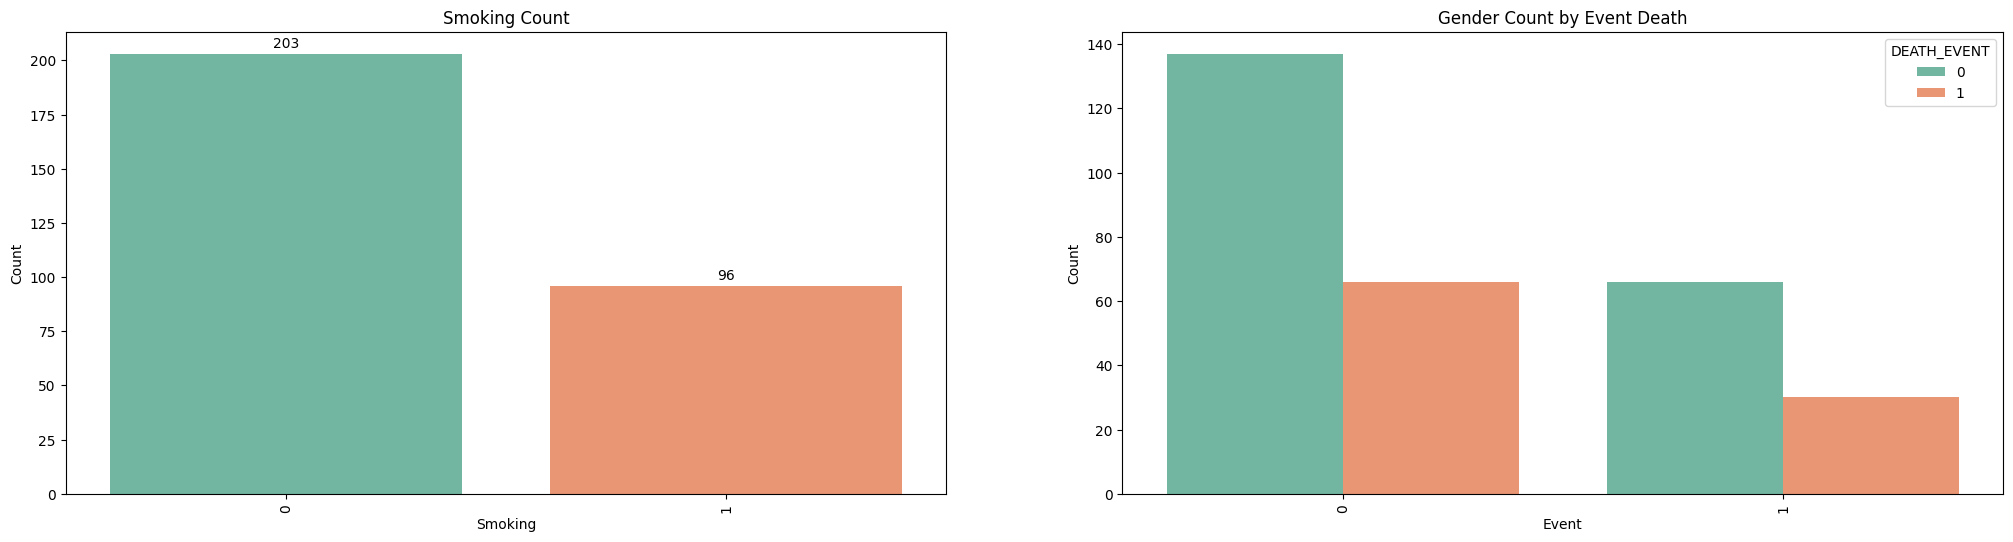

In [17]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='smoking', data=data, order=data.smoking.value_counts().index, palette='Set2')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('Smoking Count')
plt.xlabel('Smoking')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='smoking', data=data, order=data.smoking.value_counts().index, palette='Set2', hue='DEATH_EVENT')
plt.title('Gender Count by Event Death')
plt.xlabel('Event')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Jumlah pasien yang **tidak merokok** lebih banyak dibanding yang **merokok**. Hasil bar chart menunjukkan jumlah pasien yang **tidak merokok dan tidak meninggal** karena gagal jantung lebih benyak dibanding pasien yang **merokok dan tidak meninggal**. Akan tetapi, jumlah pasien yang **tidak merokok dan meninggal** juga lebih banyak dibanding pasien yang **merokok dan meninggal**.   

**Analisis Usia Pasien**

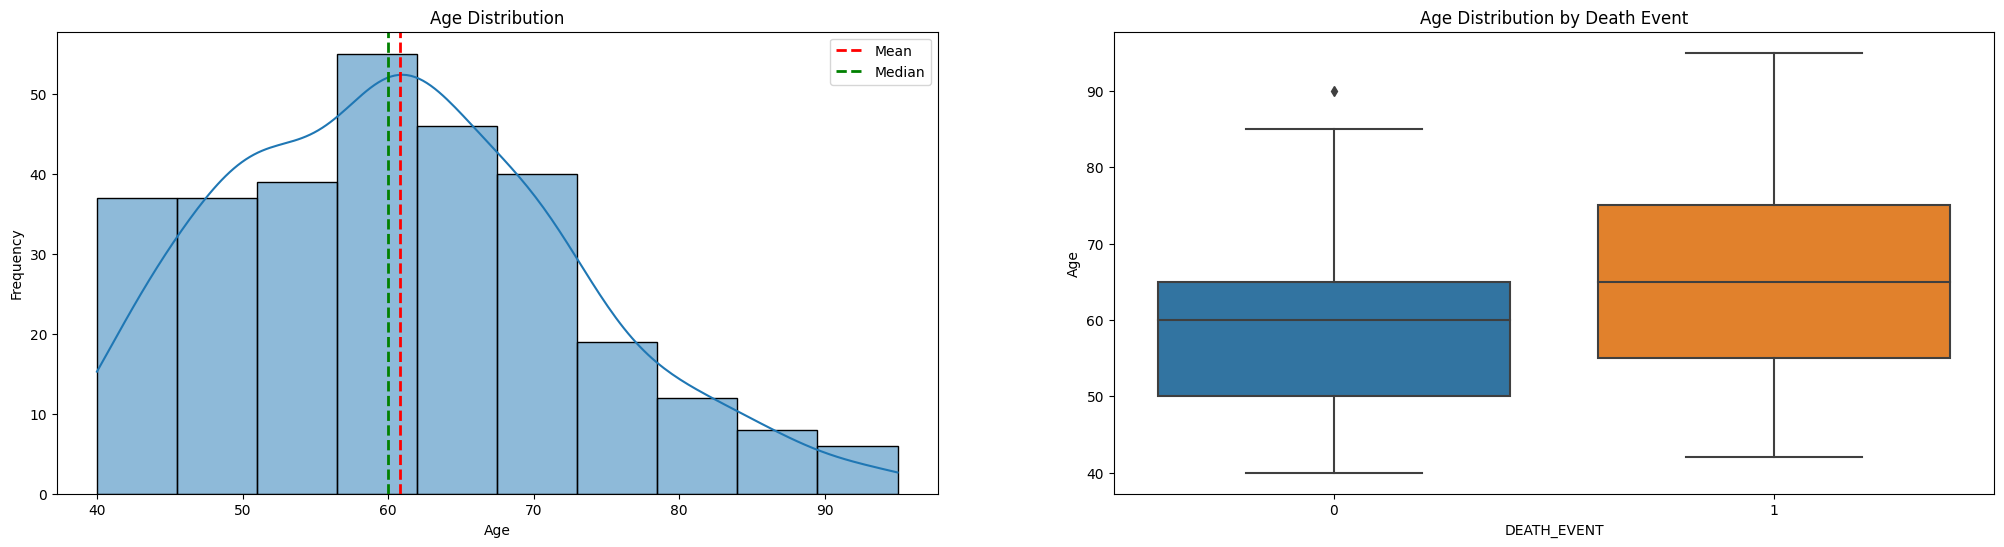

Skewness: 0.4230619067286355
Minumum Age: 40.0
Maximum Age: 95.0


In [19]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=data, kde=True)
plt.axvline(data.age.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.age.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='age', data=data)
plt.title('Age Distribution by Death Event')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Age')
plt.show()
print(f'Skewness: {data.age.skew()}')
print(f'Minumum Age: {data.age.min()}')
print(f'Maximum Age: {data.age.max()}')

Distribusi data usia tergolong normal dan terlihat adanya otlier dalam boxplot. Data usia pasien dimulai dari usia 40 hingga 95 tahun. Rentang usia pasien yang mengalami kematian akibat gagal jantung berada di kisaran 53 hingga 75 tahun.

Creatine Phospokinase

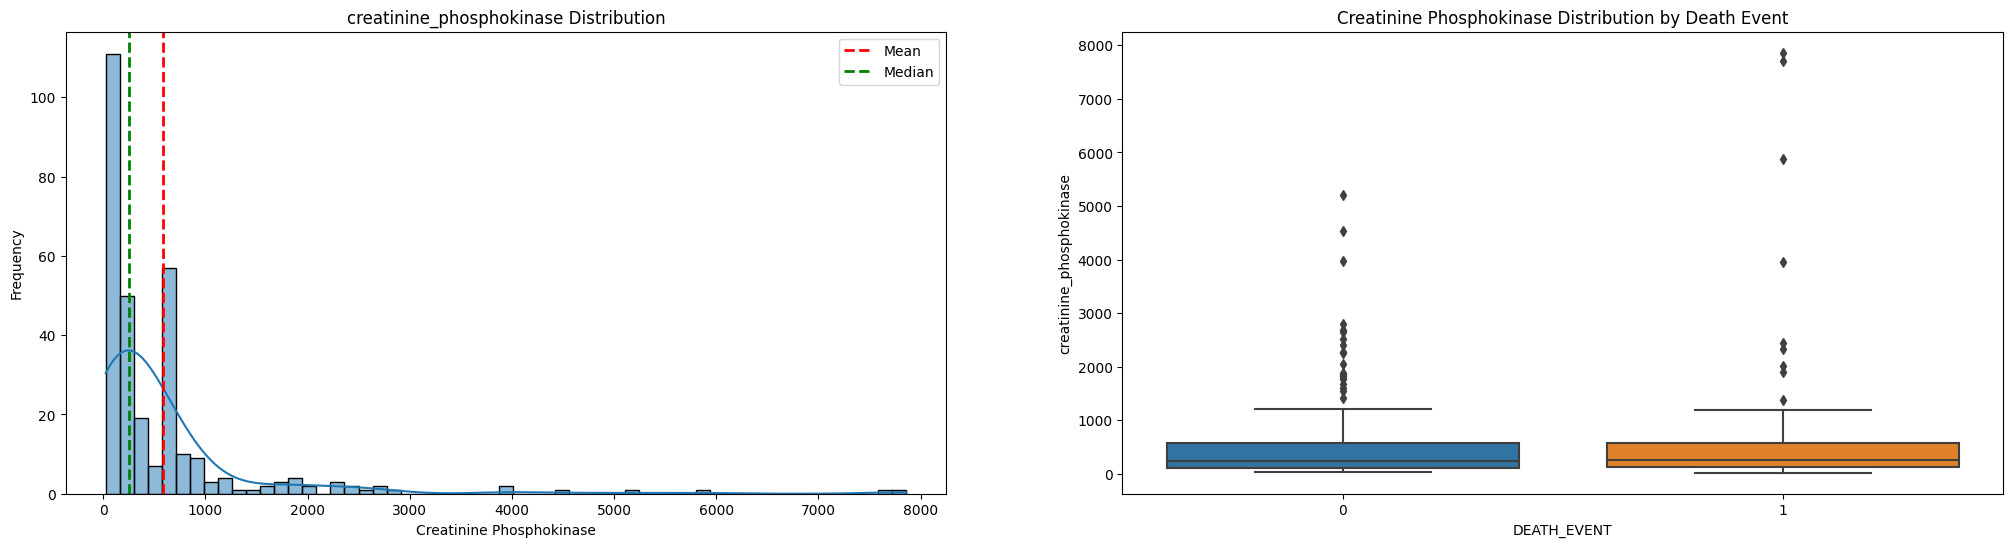

Skewness: 4.463110084653752
Minumum Ceatinine Phosphokinase: 23
Maximum Creatinine Phosphokinase: 7861


In [20]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='creatinine_phosphokinase', data=data, kde=True)
plt.axvline(data.creatinine_phosphokinase.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.creatinine_phosphokinase.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('creatinine_phosphokinase Distribution')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=data)
plt.title('Creatinine Phosphokinase Distribution by Death Event')
plt.xlabel('DEATH_EVENT')
plt.ylabel('creatinine_phosphokinase')
plt.show()
print(f'Skewness: {data.creatinine_phosphokinase.skew()}')
print(f'Minumum Ceatinine Phosphokinase: {data.creatinine_phosphokinase.min()}')
print(f'Maximum Creatinine Phosphokinase: {data.creatinine_phosphokinase.max()}')

Rata" Creatinine phospokginase pasien yang meninggal 23 mcg/L s.hingga 800 mcg/l. Ada beberapa data dengan creatinine phospokginase yang lebih dari 800 mcg/L, namun terdeteksi sebagai outlier. Hal ini dikarenakan distribusi data creatinine phospokginase tergolong extreme skewed.Distribusi data ejeksi fraksi sudah tergolong skewed dan ditemukan outlier seperti yang ditunjukkan pada boxplot. Umumnya fraksi ejeksi pasien yang meninggal karena gagal jantung berkisar 14% hingga 40%. Data fraksi ejeksi yang lebih dari 60% untuk pasien meningal dianggap sebagai outlier. Distribusi data platelets tergolong distribusi skewed dan masih ditemukan adanya outlier pada data ini. Jumlah platelets pasien meninggal akibat gagal jantung berkisar dari 200000(kiloplatelets/ml) hingga (kiloplatelets/ml). Distibusi data serum creatinine tergolong extreme skewed. Umumnya level serum creatinine dalam darah pasien yang meninggal berada pada kisaran 1 hingga 0.8 (mg/dL). Distibusi data serum sodium tergolong extreme skewed. Umumnya level serum creatinine dalam darah pasien yang meninggal berada pada kisaran 1 hingga 0.8 (mg/dL). 

Rata" Creatinine phospokginase pasien yang meninggal 23 mcg/L s.hingga 800 mcg/l. Ada beberapa data dengan creatinine phospokginase yang lebih dari 800 mcg/L, namun terdeteksi sebagai outlier. Hal ini dikarenakan distribusi data creatinine phospokginase tergolong extreme skewed.

**Ejection Fraction**

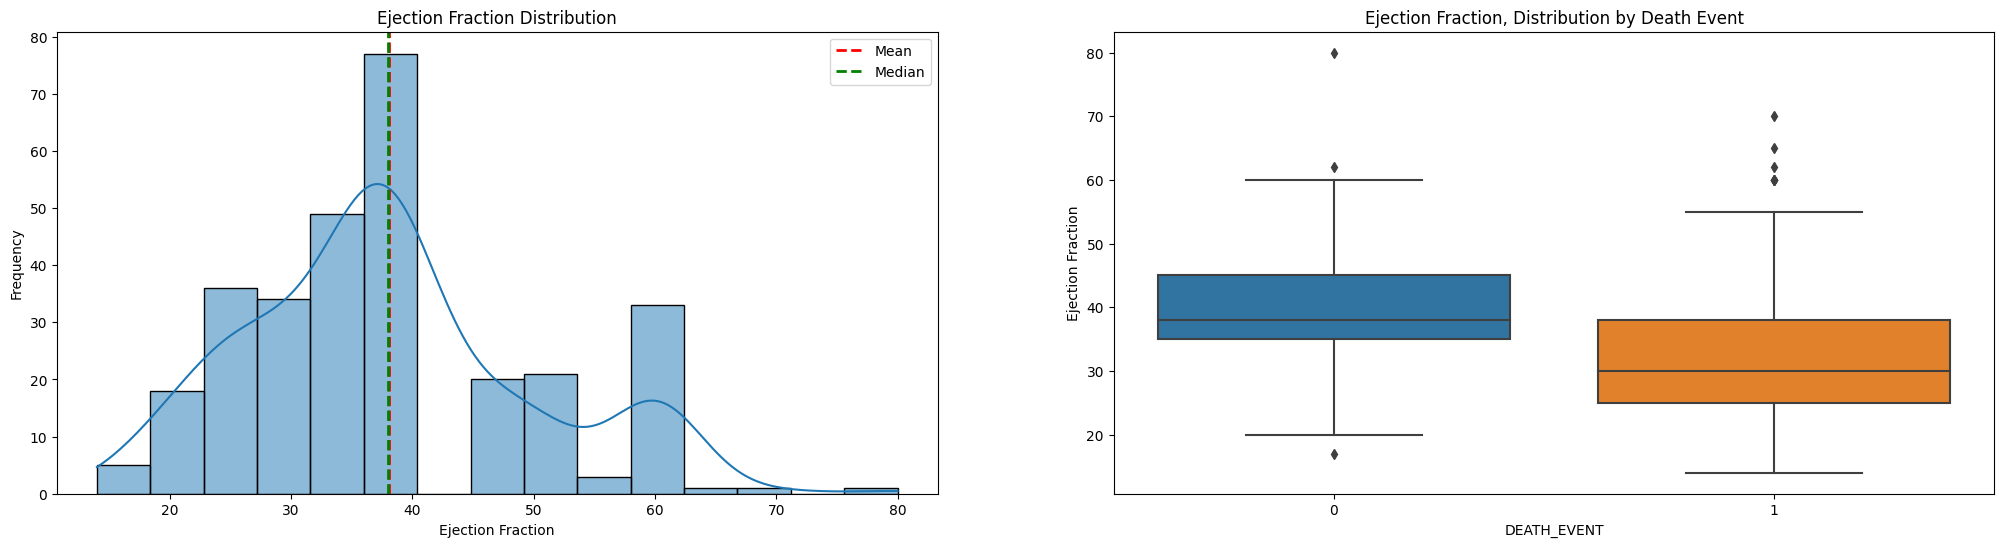

Skewness: 0.5553827516973213
Minumum Ejection Fraction: 14
Maximum Ejection Fraction: 80


In [21]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='ejection_fraction', data=data, kde=True)
plt.axvline(data.ejection_fraction.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.ejection_fraction.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Ejection Fraction Distribution')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data)
plt.title('Ejection Fraction, Distribution by Death Event')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Ejection Fraction')
plt.show()
print(f'Skewness: {data.ejection_fraction.skew()}')
print(f'Minumum Ejection Fraction: {data.ejection_fraction.min()}')
print(f'Maximum Ejection Fraction: {data.ejection_fraction.max()}')

Distribusi data ejeksi fraksi sudah tergolong skewed dan ditemukan outlier seperti yang ditunjukkan pada boxplot. Umumnya fraksi ejeksi pasien yang meninggal karena gagal jantung berkisar 14% hingga 40%. Data fraksi ejeksi yang lebih dari 60% untuk pasien meningal dianggap sebagai outlier. 

**Analisis Platelets**

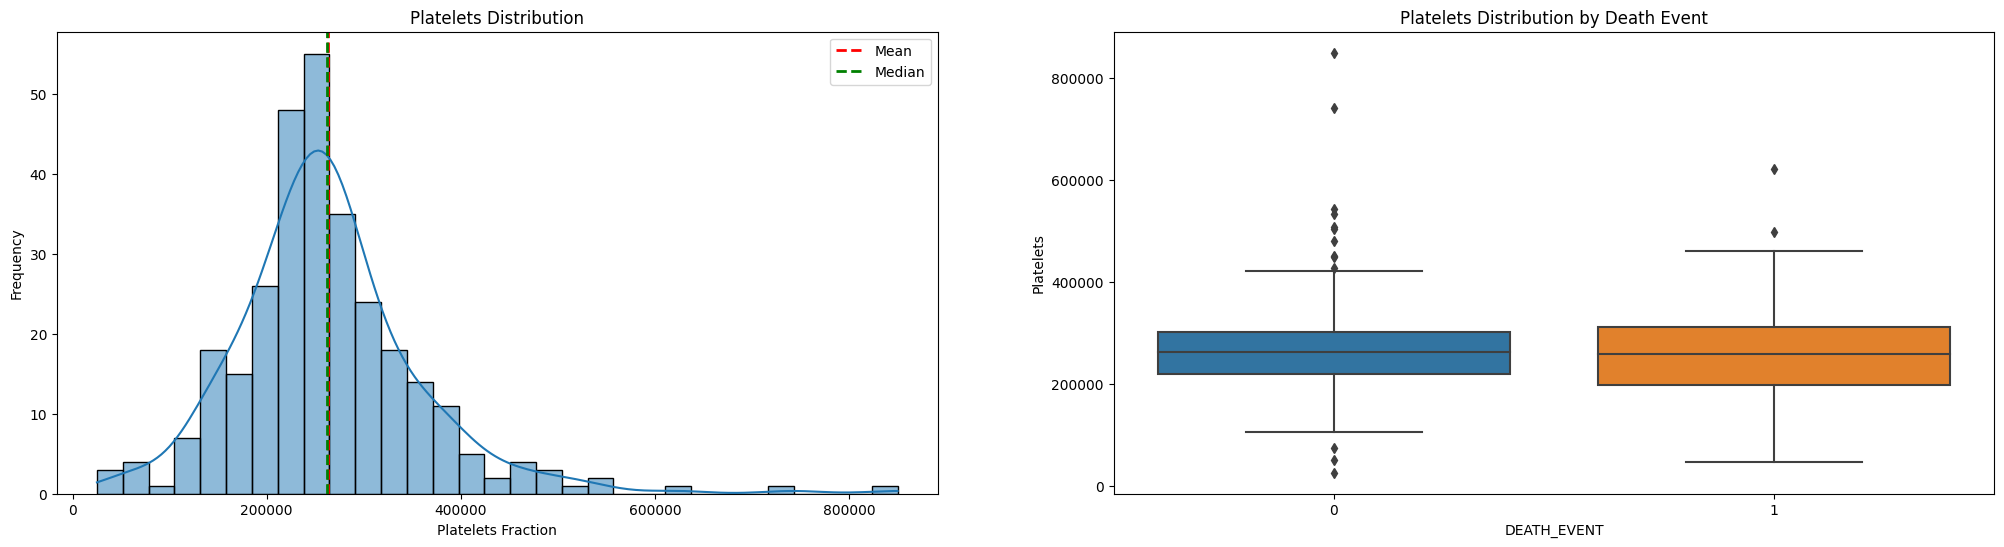

Skewness: 1.462320838275779
Minumum Platelets: 25100.0
Maximum Platelets: 850000.0


In [22]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='platelets', data=data, kde=True)
plt.axvline(data.platelets.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.platelets.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Platelets Distribution')
plt.xlabel('Platelets Fraction')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='platelets', data=data)
plt.title('Platelets Distribution by Death Event')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Platelets')
plt.show()
print(f'Skewness: {data.platelets.skew()}')
print(f'Minumum Platelets: {data.platelets.min()}')
print(f'Maximum Platelets: {data.platelets.max()}')

Distribusi data platelets tergolong distribusi skewed dan masih ditemukan adanya outlier pada data ini. Jumlah platelets pasien meninggal akibat gagal jantung berkisar dari 200000(kiloplatelets/ml) hingga (kiloplatelets/ml). 

**Analisis Serum Creatinine**

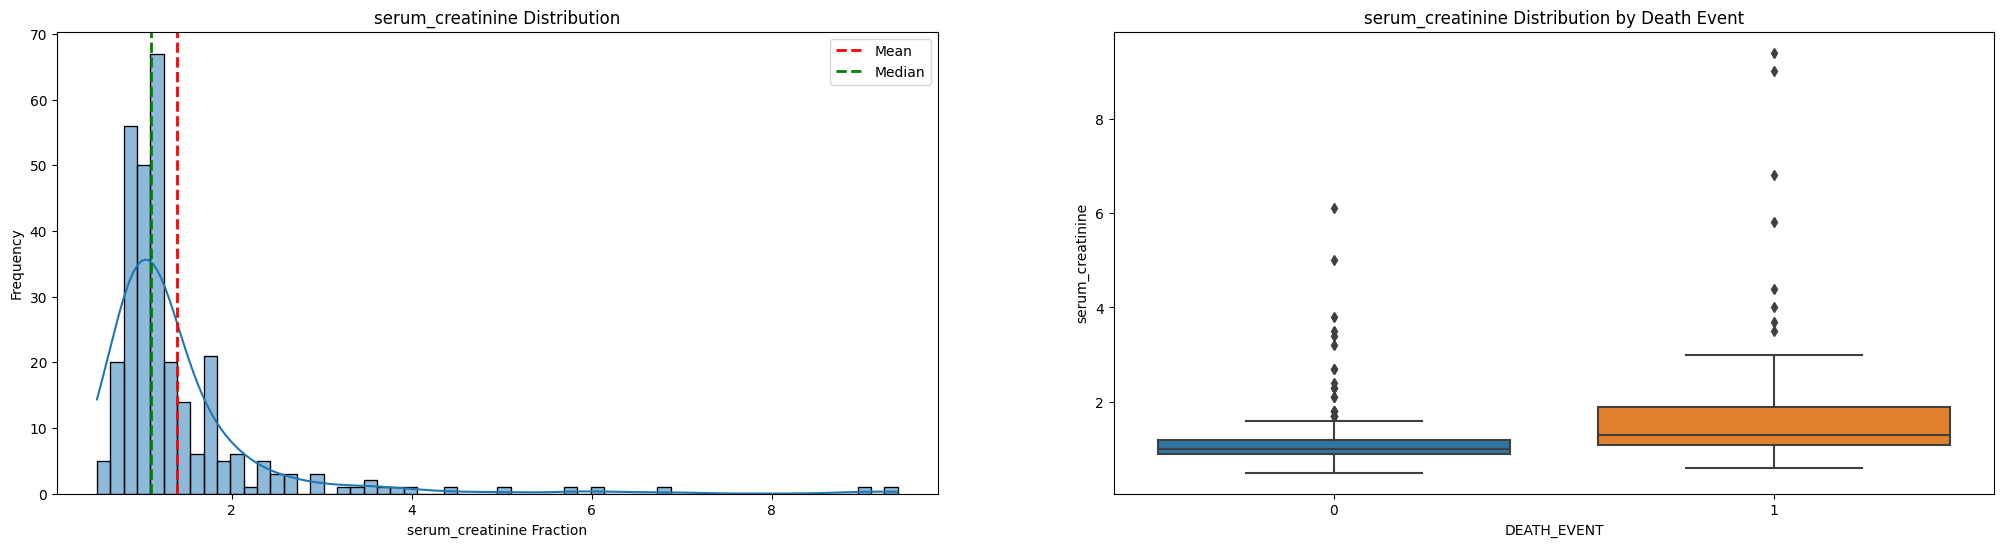

Skewness: 4.455995882049029
Serum_creatinine Fraction: 0.5
Serum_creatinine Fraction: 9.4


In [23]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='serum_creatinine', data=data, kde=True)
plt.axvline(data.serum_creatinine.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.serum_creatinine.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('serum_creatinine Distribution')
plt.xlabel('serum_creatinine Fraction')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data)
plt.title('serum_creatinine Distribution by Death Event')
plt.xlabel('DEATH_EVENT')
plt.ylabel('serum_creatinine')
plt.show()
print(f'Skewness: {data.serum_creatinine.skew()}')
print(f'Serum_creatinine Fraction: {data.serum_creatinine.min()}')
print(f'Serum_creatinine Fraction: {data.serum_creatinine.max()}')

Distibusi data serum creatinine tergolong extreme skewed. Umumnya level serum creatinine dalam darah pasien yang meninggal berada pada kisaran 1 hingga 0.8 (mg/dL). 

**Analisis serum sodium**

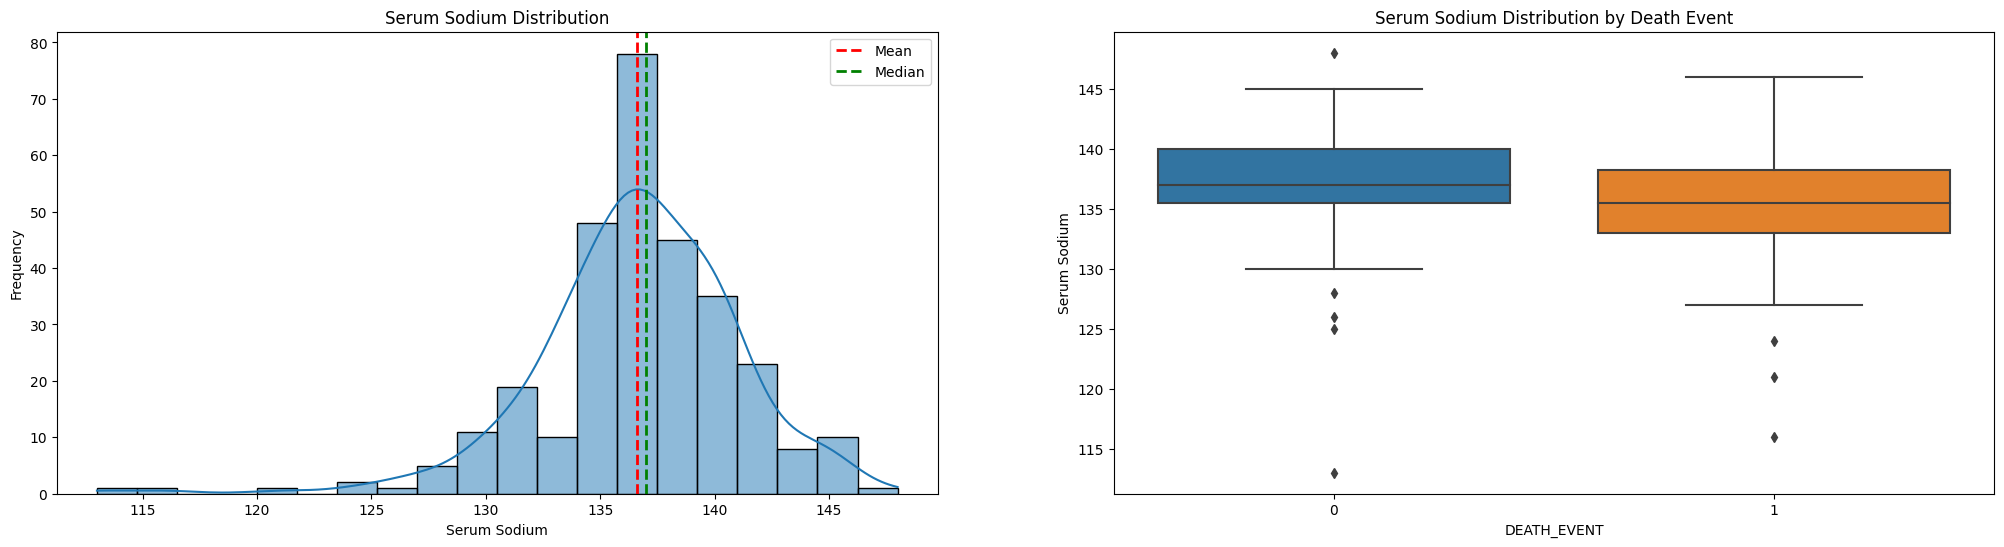

Skewness: -1.0481360160574988
Minumum Serum Sodium: 113
Maximum Serum Sodium: 148


In [24]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='serum_sodium', data=data, kde=True)
plt.axvline(data.serum_sodium.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.serum_sodium.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Serum Sodium Distribution')
plt.xlabel('Serum Sodium')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=data)
plt.title('Serum Sodium Distribution by Death Event')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Serum Sodium')
plt.show()
print(f'Skewness: {data.serum_sodium.skew()}')
print(f'Minumum Serum Sodium: {data.serum_sodium.min()}')
print(f'Maximum Serum Sodium: {data.serum_sodium.max()}')

Distibusi data serum sodium tergolong extreme skewed. Umumnya level serum creatinine dalam darah pasien yang meninggal berada pada kisaran 1 hingga 0.8 (mg/dL). 

## Data Processing

Pada tahap processing, data akan dibagi menjadi 3 yaitu data train, data test dan data inference. Kemudian kita akan menggunakan paket Pipline untuk normalisasi data dan pemodelan, shingga kita tidak perlu melakukan fiture selection. Pada tahap ini, tidak dilakukan data cleaning karena tidak terdapat missing values dan tidak merocing outlier karena banyaknya outlier yang terdeteksi dan manipulasi data akan berpengaruh terhadap prediksi data yang baru nanti.

In [27]:
# Get Data for Model Inference
data_inf = data.sample(10, random_state =17)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
121,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
94,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
138,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
288,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
139,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
13,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
230,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
165,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
58,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
122,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


In [28]:
# Remove Inference -set from Dataset
data_train_test = data.drop(data_inf.index)

In [29]:
# Reset Index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace = True)
data_inf.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
1,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
2,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0


Setelah split data inference, split fiture dan target.

In [32]:
# Splitting between 'X' and 'y'
X = data_train_test.drop(['DEATH_EVENT'], axis = 1)
y = data_train_test['DEATH_EVENT']

In [33]:
# Splitting between Train-set and Test-set
# Set 0.2 for 20% test-set and 80% train-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4,stratify=y)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (231, 12)
Test Size :  (58, 12)


Imbalanced data akan menyebabkan ketidakseimbangan machine learning. Pembelajaran ML akan lebih berfokus terhadap data mayoritas, sehingga kita perlu handling masalah imbalance data ini dengan melakukan resampling data. Kita akan melakukan oversampling dengan algoritma SMOTE

In [44]:
# melihat jumlah data pada setiap kelas
y_train.value_counts()

0    158
1     73
Name: DEATH_EVENT, dtype: int64

In [47]:
#Definisi smote
smote = SMOTE()

# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape', len(y))

Resampled dataset shape 289


In [48]:
# melihat data pada setiap kelas
y_train.value_counts()

0    158
1    158
Name: DEATH_EVENT, dtype: int64

Setelah melakukan resampling jumlah data tiap kelas sudah seimbang.

**Pipeline**

Pada bagian ini akan dibuat pipeline untuk melakukan normalisasi data (scaling) menggunakan MinMaxScaler() d sekaligus untuk membuat model dengan algoritma classification yang digunakan adalah Random Forest Classifier, Extreme Gradient Boosting.

Lalu, kedua pipeline akan digabungkan menjadi 1 pipeline preprocessing menggunakan ColumnTransformer().

In [84]:
#Definisikan scalling
scaler_standard = MinMaxScaler()

In [85]:
# Numeric Features Scaling
scalling_pipe = Pipeline([('scaling', MinMaxScaler())])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('num',scalling_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns)

])

Membuat pipeline untuk melakukan preprocessing dan juga modeling.

In [88]:
# Random Forest Pipeline
forest_pipe = Pipeline([('preprocessing', preprocess), ('classifier', RandomForestClassifier(random_state=22))])
# Extreme Gradient Boosting Pipeline
xgb_pipe = Pipeline([('preprocessing', preprocess), ('classifier', XGBClassifier(verbosity = 0, silent=True, random_state=22))])

Selanjutnya, buat dictionary uang berisi hyperparameter untuk setiap model yang nantinya akan dicari parameter terbaik  menggunakan grid search.

In [89]:
# Random Forest
forest_params = {'classifier__criterion': ['gini', 'entropy'],
                 'classifier__max_features': ['auto', 'sqrt', 'log2'],
                 'classifier__n_estimators': [100, 150, 200, 250, 300]}
# Extreme Gradient Boosting
xgb_params = {'classifier__n_estimators': [100, 150, 200, 250, 300],
              'classifier__max_depth': [2, 3, 4, 5, 6],
              'classifier__learning_rate': [0.001, 0.01, 0.1, 1],
              'classifier__use_label_encoder': [False],
              'classifier__objective': ['binary:logistic']}

## Model Definition

Setiap model akan dituning menggunakan GridSearchCV dengan 5 Cross-Validation.

In [62]:
forest = GridSearchCV(forest_pipe, param_grid=forest_params, cv=5, n_jobs=-1)
xgb = GridSearchCV(xgb_pipe, param_grid=xgb_params, cv=5, n_jobs=-1)

## Model Training

Pada tahap ini kita akan mencari parameter terbaik dari hasil training data.

In [90]:
%timeit forest.fit(X_train, y_train)
%timeit xgb.fit(X_train, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_

18.1 s ± 682 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 

13.8 s ± 396 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [92]:
#Mencari best parameter pada setiap model
best_forest = forest.best_estimator_
print('\n-------Random Forest Best Hyperparameter-------')
print(forest.best_params_)

best_xgb = xgb.best_estimator_
print('\n-------Extreme Gradient Boosting Best Hyperparameter-------')
print(xgb.best_params_)


-------Random Forest Best Hyperparameter-------
{'classifier__criterion': 'gini', 'classifier__max_features': 'auto', 'classifier__n_estimators': 100}

-------Extreme Gradient Boosting Best Hyperparameter-------
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 200, 'classifier__objective': 'binary:logistic', 'classifier__use_label_encoder': False}


## Model Evaluation

Pada tahap ini, digunakan confusion metrix dan classification report untuk melihat performa setiap model.

In [67]:
#Buat dataframe evaluation
evaluations = pd.DataFrame(columns=['model', 'training_score', 'test_score'])

In [68]:
evaluations.loc[0] = ['Random Forest', round(forest.score(X_train, y_train), 3), round(forest.score(X_test, y_test), 3)]
evaluations.loc[1] = ['XGBoost', round(xgb.score(X_train, y_train), 3), round(xgb.score(X_test, y_test), 3)]

In [69]:
#Confusion Metrics
confusions = [confusion_matrix(y_test, forest.predict(X_test)),
              confusion_matrix(y_test, xgb.predict(X_test))]

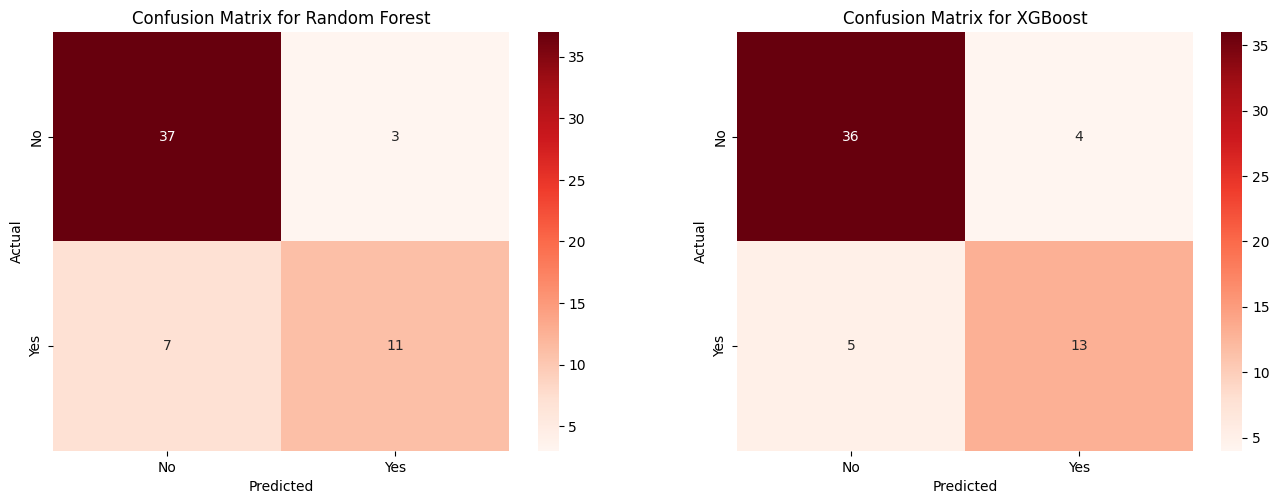

In [93]:
#Plotting
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix for {evaluations.iloc[i, 0]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

Confusion matrix menunjjukkan model XGBoost lebih baik dalam memprediksi kematian seseorang akibat gagal jantung dibanding model random forest.

**Classification Report**

In [94]:
# Logistic Regression
print("train_forest", classification_report(y_train, forest.predict(X_train)))
print("test_forest", classification_report(y_test, forest.predict(X_test)))

train_forest               precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       158

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316

test_forest               precision    recall  f1-score   support

           0       0.84      0.93      0.88        40
           1       0.79      0.61      0.69        18

    accuracy                           0.83        58
   macro avg       0.81      0.77      0.78        58
weighted avg       0.82      0.83      0.82        58



In [95]:
# Logistic Regression
print("train_xgboost", classification_report(y_train, xgb.predict(X_train)))
print("test_sgboost", classification_report(y_test, xgb.predict(X_test)))

train_xgboost               precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       158

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316

test_sgboost               precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.76      0.72      0.74        18

    accuracy                           0.84        58
   macro avg       0.82      0.81      0.82        58
weighted avg       0.84      0.84      0.84        58



Hasil accuracy f1 score kedua model menujukkan seluruh model tergolong overfit karena perebedaan score yang sangat signifikan antara data train dan data set. Dibandingkan dengan nilai f1 score model XGBoost juga lebih baik dalam memprediksi data.

## Model Inference

Pada tahap ini setiap model akan diuji pada 10 data baru inference dan membandingkan performa model.

In [80]:
#Split data fiture dan target
X_inf = data_inf.drop(['DEATH_EVENT'], axis=1)
y_inf = data_inf['DEATH_EVENT']

Hasil prediksi dari setiap model diubah dalam bentuk dataframe

In [81]:
#Prediksi data inference
forest_pred = pd.DataFrame(best_forest.predict(X_inf))
xgb_pred = pd.DataFrame(best_xgb.predict(X_inf))

#Concate data 
preds = pd.concat([data_inf['DEATH_EVENT'].reset_index(drop=True), forest_pred, xgb_pred], axis=1)
preds.columns = ['Actual', 'Forest', 'XGBoost']
# Showing data
preds

,Actual,Forest,XGBoost
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,0
5,0,0,0
6,1,1,1
7,0,0,0
8,1,1,1
9,1,0,0


In [82]:
# Logistic Regression
print("Forest Model", classification_report(y_inf, xgb.predict(X_inf)))
print("XGBoost", classification_report(y_inf, xgb.predict(X_inf)))

Forest Model               precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10

XGBoost               precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



Data prediksi menunjukkan kedua model hanya mampu memprediksi 7 dari 10 data dengan tepat. Hal ini sesuai dengan accuracy score setiap data yaitu 0.70. Kedua model memprediksi 3 data pasien yang **meninggal** sebagai pasien yang **tidak meninggal**. Hasil analisa akhir disimpulkan bahwa performa kedua model belum baik.

## Kesimpulan

**Exploratory Data Analysis**
Hasil plotting pie chart dan bar chart menunjukkan adanya imbalanced data, presentase pasien yang **meninggal** akibat gagal jantung sebesar **67.9%** dan data pasien yang bertahan **hidup** sebesar **32,1%**. Imbalanced data akan berpengaruh pada proses pembelajaran machine learning, sehingga perlu melakukan resempling sebelum pemodelan.Jumlah pasien yang **tidak mengidap** anaemia lebih banyak dibanding yang **mengidap** anaemia. Jumlah pasien yang **tidak mengidap** diabetes lebih banyak dibanding yang **mengidap** diabetes. Jumlah pasien yang **tekanan darahnya tinggi** lebih besar dibanding pasien yang **tekanan darahnya tidak tinggi**. Data pasien didominasi oleh gender **male**. Jumlah gender **male yang tidak meninggal** akibat gagal jantung lebih banyak dibanding dengan jumlah gender **male yang meninggal**. Sama halnya dengan gender male,  jumlah gender **female yang tidak meninggal** akibat gagal jantung lebih banyak dibanding dengan jumlah gender **female yang meninggal**. Jumlah pasien yang **tidak merokok** lebih banyak dibanding yang **merokok**.

Rentang usia pasien yang mengalami kematian akibat gagal jantung berada di kisaran 53 hingga 75 tahun.Rata" Creatinine phospokginase pasien yang meninggal 23 mcg/L s.hingga 800 mcg/l.Umumnya fraksi ejeksi pasien yang meninggal karena gagal jantung berkisar 14% hingga 40%.  Jumlah platelets pasien meninggal akibat gagal jantung berkisar dari 200000(kiloplatelets/ml) hingga (kiloplatelets/ml).Umumnya level serum creatinine dalam darah pasien yang meninggal berada pada kisaran 1 hingga 0.8 (mg/dL). Umumnya level serum creatinine dalam darah pasien yang meninggal berada pada kisaran 1 hingga 0.8 (mg/dL).

**Data Preprocessing**
Pada tahap preprocessing, dilakukan resampling dengan teknik oversampling karena minimnya jumlah data serta menggunakan SMOTE sebagai algoritmanya. Selain itu, dilakukan normalisasi data (scalling) menggunakan algoritma MinMaxScaler dengan Pipliene yang juga digunakan pada tahap pemodelan, sehingga tidak dilakukan fiture selection. Pada tahap ini tidak dilakukan data cleaning karena tidak terdapat missing values pada data serta banyaknya outliers menjadi pertimbangan dalam penanganannya. Jika data dihapus, maka data semakin sedikit dan informasi yang diterima semakin sedikit. Jika diimputasi dengan nilai tertentu, maka akan berpengaruh terhadap prediksi data baru nanti.

**Modeling**
Pada pemodelan kita menggunaan Randomforest dan XGBoost model dengan hyperparameter setiap model. Kemudian setiap model akan dituning menggunakan GridSearchCV dengan 5 Cross-Validation. Dari hasil evaluasi menggunakan confussion metricx dan classification report didapatkan model XGBoost memiliki performa yang lebih baik dibanding model random forest. Pada model inference, kedua model berhasil memprediksi dengan benar 5 pasien yang masih **bertahan/tidak meinggal** dan memprediksi 2 pasien yang **meninggal**. Kedua model sama memprediksi pasien berhasil **survived/tidak meninggal** yang seharusnya merupakan pasien yang meninggal akibat gagal jantung. Performa kedua model terhadap data inference sama saja karena presentase score kedua model sama.

**Conceptual Problems**
1. Apakah yang dimaksud dengan Bagging?
Jawab : Bagging atau bootstrap aggregation adalah metode ensemble yang melakukan training beberapa classifier secara terpisah (paralel). Hasil dari training klasifier2 ini kemudian dikombinasi untuk menghasilkan prediksi akhir dari sistem.
2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?
Jawab : 
Model random forest dan XGBoost merupakan algortitma yang dasarnya dari decision tree. Bedanya random forest menggunakan algoritma bagging dari ensamble learning untuk meningkatkan performanya. Sedangkan XGBoost menerapkan algoritma boosting menggunakan beberapa model secara sequensial untuk meningkatkan performa.